**VISUALISING MUSIC GENRES**
Here I aim to visualise the data found of different music genres. The Music Genre Classification notebook shows the extraction of features from the audio samples such as the MFCC (Mel Frequency Cepstrum Components).

Visualising techniques:
- Visualise Mel Frequency Cepstal Coefficients using colormap
    - Aim to see if there are any clear differences between MFCCs for different genres
- PCA
- Heatmap
- 

Volume, Energy, Pitch, Zero Crossing Rate, Spectral Centroid etc. as some additional features along with MFCC. I also suggest you to use some feature selection techniques like Principal Component Analysis (PCA) or t-sne (t-distributed stochastic neighbor embedding) for identifying optimal features. This would help you get better results.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import math, random, pickle, os, operator
from tempfile import TemporaryFile

from scipy.io import wavfile
from python_speech_features import mfcc
%matplotlib inline

In [2]:
# loading data into Pandas dataframe to help visualisation
dataset = []

with open("feat.dat", 'rb') as f:
    while True:
        try:
            dataset.append(pickle.load(f))
        except EOFError:
            f.close()
            break

In [77]:
# specify genres
genres = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock']

In [13]:
# Visualise MFCC
mfcc_feat = []
# take MFCC from first signal from each genre
path  = "D:/Datasets/genres/"
genre=0
for fold in os.listdir(path):
    genre+=1
    if genre==11:
        break
    for file in os.listdir(path+fold):
        (rate, sig) = wavfile.read(path+fold+"/"+file)
        mfcc_f = mfcc(sig, rate, winlen=0.02, appendEnergy = False)
        mfcc_feat.append((mfcc_f, genre))
        break
f.close()

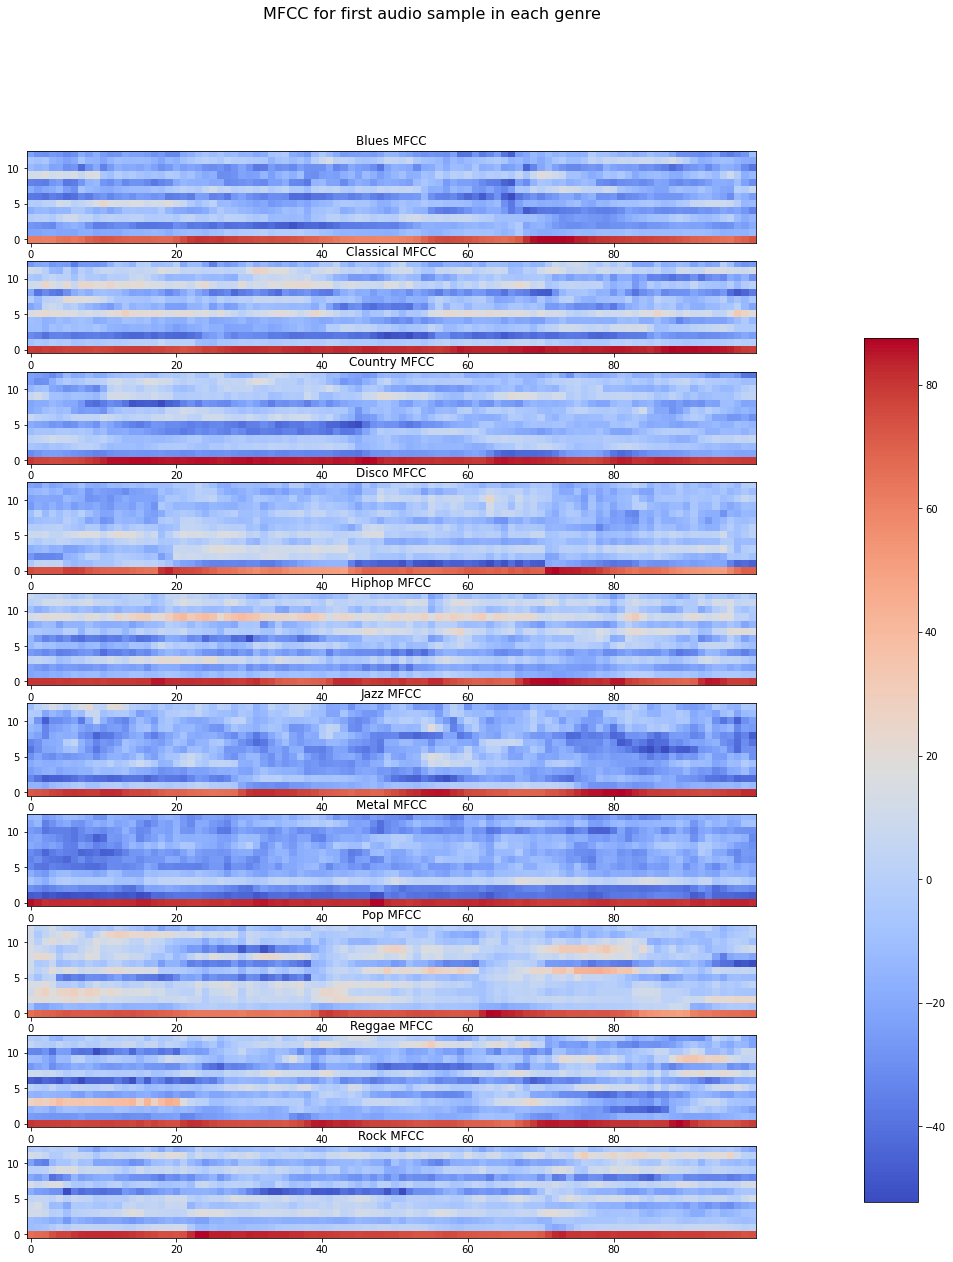

In [108]:
# plot MFCC
fig, ax = plt.subplots(10,1, figsize=(15,20))

# Plot first 13cepstral coefficients from MFCC for the beggining of the first audio sample in each genre file
for i in range(10):
    
    ax[i].set_title(genres[i]+' MFCC')
    mfcc_feat_swap = np.swapaxes(mfcc_feat[i][0], 0, 1)
    c_ax = ax[i].imshow(mfcc_feat_swap[:,:100], aspect='auto',cmap=cm.coolwarm, origin='lower')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.6])
fig.colorbar(c_ax, cax=cbar_ax)
fig.suptitle("MFCC for first audio sample in each genre", fontsize=16)
plt.show()

**Guide to MFCC Coefficient values:**

Positive:
- Represent sonorant sounds - majority of spectral energy concentrated in low-frequency regions

Negative:
- Represent fricative sounds - majority of spectral energy concentrated at high-frequency regions

Low order coefficients:
- Contain info on overall spectral shape

Zero-order coefficient:
- Average power of input signal

First-order coefficient:
- Distribution of spectral energy between low and high frequencies

Higher order coefficients
- Represent increasing levels of spectral details


Maybe it makes more sense to plot the mean across all windows:

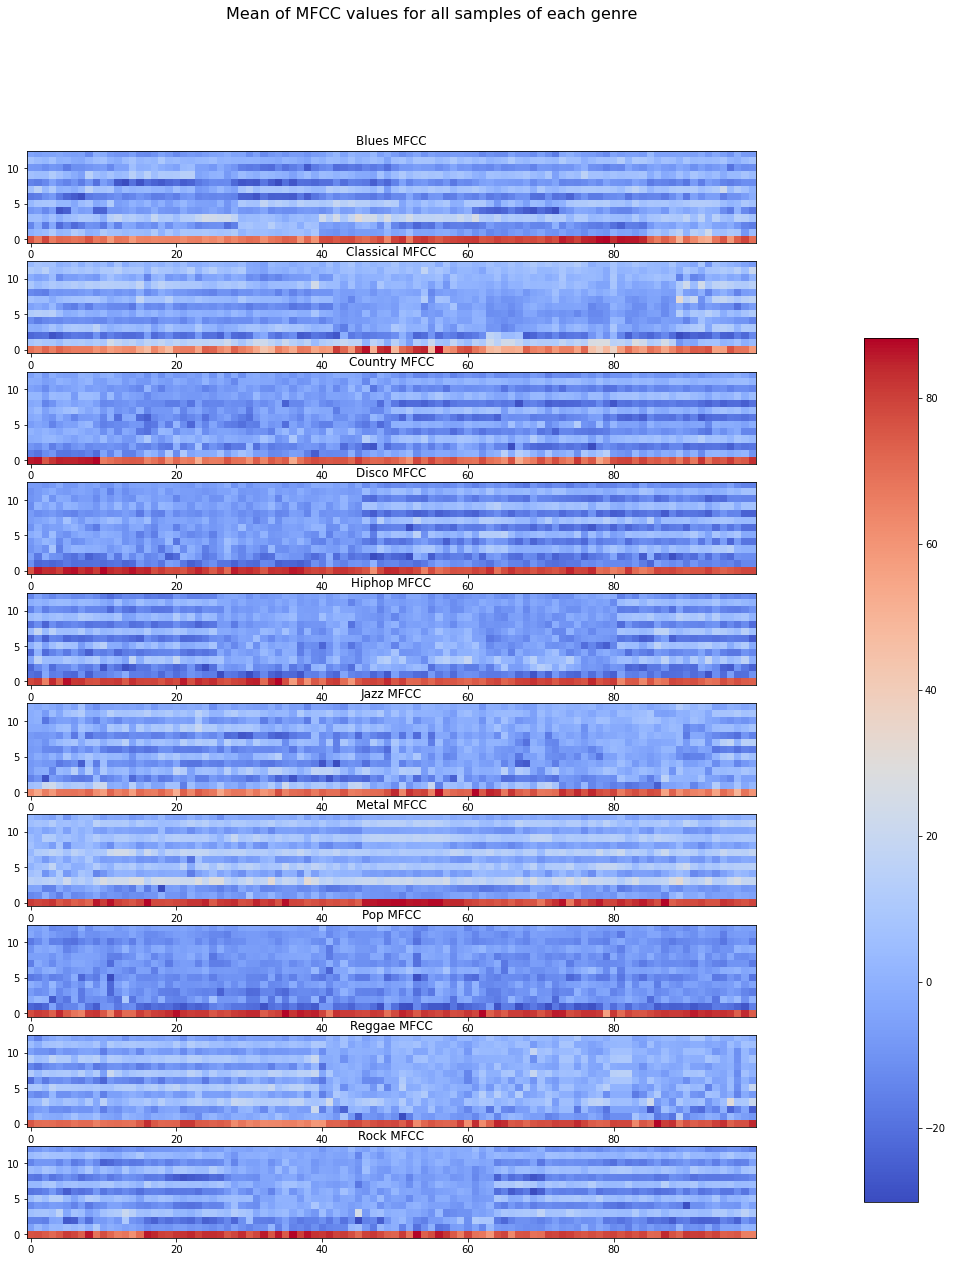

In [189]:
# plot MFCC
fig, ax = plt.subplots(10,1, figsize=(15,20))

mfcc_mean = [] # 1000 samples by 13 cepstral coefficients
with open("feat.dat", 'rb') as f:
    while True:
        try:
            # load in a sample's mean matrix for each of the 13 cepstral coefficients
            mfcc_mean.append(pickle.load(f)[0])
        except EOFError:
            f.close()
            break
mfcc_mean = np.array(mfcc_mean)
# n+100*i sample is the nth sample in the ith genre
for i in range(10):
    
    ax[i].set_title(genres[i]+' MFCC')
    mfcc_mean_swap = np.swapaxes(mfcc_mean, 0, 1)
    c_ax = ax[i].imshow(mfcc_mean_swap[:,i*100:(i+1)*100], aspect='auto',cmap=cm.coolwarm, origin='lower')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.6])
fig.colorbar(c_ax, cax=cbar_ax)
fig.suptitle("Mean of MFCC values for all samples of each genre", fontsize=16)
plt.show()

Could also plot average of MFCC mean matrices for samples in each genre

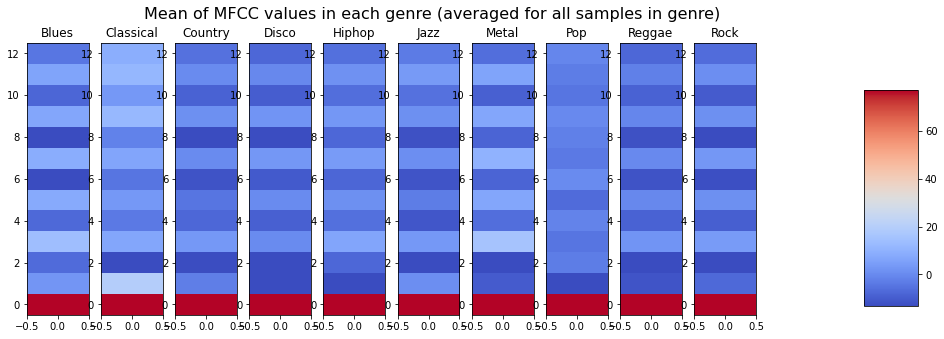

In [190]:
mfcc_mmean = mfcc_mean.mean(0)
mfcc_mmean

# Plot
fig, ax = plt.subplots(1,10, figsize=(15,5))
for i in range(10):
    
    ax[i].set_title(genres[i])
    mfcc_mmean_swap = np.swapaxes(mfcc_mean, 0, 1)
    mfcc_mean_col = np.array([mfcc_mmean_swap[:,i*100:(i+1)*100].mean(1)]).transpose()
    c_ax = ax[i].imshow(mfcc_mean_col, aspect='auto',cmap=cm.coolwarm, origin='lower')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.6])
fig.colorbar(c_ax, cax=cbar_ax)
fig.suptitle("Mean of MFCC values in each genre (averaged for all samples in genre)", fontsize=16)
plt.show()

Conclusions of MFCC analysis:

First Coefficient
- Disco seems to have the lowest first order MFCC (mostly fricative sounds at high frequencies)
- Classical has the highest first order MFCC (mostly sonorant sounds at low-frequencies)
    
    



In [161]:
mfcc_mmean = mfcc_mean.mean(0)
mfcc_mmean
x = np.swapaxes(mfcc_mean, 0, 1)
x.mean(1).shape

(13,)

In [170]:
np.array([mfcc_mmean_swap[:,i*100:(i+1)*100].mean(1),np.ones(13)])

array([[ 72.3723392 ,  -1.07046685, -10.36933027,  10.02422305,
        -10.79253624,   4.29734284, -16.86813438,   4.73823896,
        -16.92597776,   2.98246397, -11.68124957,   2.3529003 ,
         -8.01498163],
       [  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ]])

In [182]:
x = np.array([mfcc_mmean_swap[:,i*100:(i+1)*100].mean(1)]).transpose()
x.shape

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [174]:
mfcc_mmean_swap.shape

(13, 1000)